In [3]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import IPython.display as ipd
import librosa
import librosa.display

In [6]:
file = 'dataset/TrainAudioFiles/0.mp3'

/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


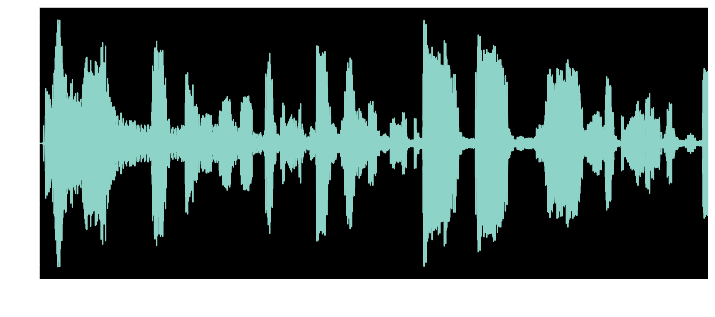

In [7]:
 # ploting the signal from the audio file
plt.figure(figsize=(12,5))
data , sample_rate = librosa.load(file)
librosa.display.waveplot(data,sr = sample_rate)
ipd.Audio(file)

In [8]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00043626,
       -0.00015566,  0.00039551], dtype=float32)

sample_rate

In [9]:
sample_rate

22050

In [10]:
train_file = 'dataset/train.csv'

import pandas as pd

train_dataset = pd.read_csv(train_file)
train_dataset.head()

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral


In [11]:
### check if the dataset is imbalanced
train_dataset['emotion'].value_counts()

neutral     2630
joy          967
surprise     640
anger        596
sadness      344
fear         328
disgust      311
Name: emotion, dtype: int64

In [12]:
# DATA Preprocessing
import pandas as pd
import os
import librosa

audio_data_path= 'dataset/TrainAudioFiles'
audio_meta_data = pd.read_csv('dataset/train.csv')
audio_meta_data.head()


,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral


In [13]:
# feature extractor
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [14]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(audio_meta_data.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_data_path),str(row["filename"]))
    final_class_labels=row["emotion"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1721it [05:27,  3.23it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1722it [05:27,  3.24it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1723it [05:27,  3.18it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1724it [05:28,  3.26it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

In [34]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-237.57819, 87.07257, -27.33685, 18.720438, -...",neutral
1,"[-269.1271, 61.45348, -34.23279, 3.3144503, -3...",neutral
2,"[-352.02917, 98.95556, -3.736993, -1.5912919, ...",joy
3,"[-211.32085, 68.19639, -53.17918, 8.498756, -2...",neutral
4,"[-382.81754, 76.51478, -20.980518, 11.586887, ...",neutral


In [35]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())


In [36]:
X.shape

(5816, 40)

In [37]:
y

array(['neutral', 'neutral', 'joy', ..., 'neutral', 'surprise', 'neutral'],
      dtype='<U8')

In [38]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [39]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [40]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
X_train

array([[-2.5875269e+02,  6.8502563e+01, -3.6509357e+01, ...,
         8.4591496e-01,  5.1804149e-01,  1.4624581e-01],
       [-5.9967322e+02,  9.8766853e+01,  6.4425617e-01, ...,
         2.6402943e+00, -1.7329860e+00,  2.5554340e+00],
       [-4.0058707e+02,  1.3469272e+02,  1.1940554e+01, ...,
         1.1493125e+00, -1.2076007e+00, -1.0040144e+00],
       ...,
       [-3.2370297e+02,  4.3589142e+01, -3.8533962e+01, ...,
         7.2911727e-01, -5.3507799e-01,  1.2771982e+00],
       [-3.7819272e+02,  9.5312569e+01, -1.0015711e+01, ...,
         1.2259666e+00,  8.8431382e-01, -9.4004065e-01],
       [-4.4087170e+02,  1.7482455e+02, -1.3217516e+01, ...,
         2.5063529e+00, -1.1610100e+00,  9.3083775e-01]], dtype=float32)

In [42]:
X_train.shape

(4652, 40)

MODEL CREATION

In [24]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [26]:
### No of classes
num_labels=y.shape[1]

In [27]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

2021-09-12 22:59:40.316514: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-12 22:59:40.316602: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (legion): /proc/driver/nvidia/version does not exist
2021-09-12 22:59:40.317256: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [29]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [30]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

2021-09-12 22:59:42.936980: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
146/146 [==============================] - 2s 2ms/step - loss: 12.9702 - accuracy: 0.2530 - val_loss: 1.8830 - val_accuracy: 0.4613

Epoch 00001: val_loss improved from inf to 1.88302, saving model to saved_models/audio_classification.hdf5
Epoch 2/100
146/146 [==============================] - 0s 899us/step - loss: 2.6299 - accuracy: 0.2954 - val_loss: 1.7921 - val_accuracy: 0.4399

Epoch 00002: val_loss improved from 1.88302 to 1.79210, saving model to saved_models/audio_classification.hdf5
Epoch 3/100
146/146 [==============================] - 0s 931us/step - loss: 1.9569 - accuracy: 0.3884 - val_loss: 1.7111 - val_accuracy: 0.4399

Epoch 00003: val_loss improved from 1.79210 to 1.71106, saving model to saved_models/audio_classification.hdf5
Epoch 4/100
146/146 [==============================] - 0s 1ms/step - loss: 1.7982 - accuracy: 0.4288 - val_loss: 1.6391 - val_accuracy: 0.4399

Epoch 00004: val_loss improved from 1.71106 to 1.63912, saving model to saved_models/audio

In [31]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.4845360815525055


In [32]:
X_test[1]

array([-2.0303822e+02,  7.2547356e+01, -3.1701643e+01,  5.7961116e+00,
       -2.6900093e+01,  8.4685154e+00, -1.6488865e+01,  1.0292713e+01,
       -1.9653570e+01,  3.2768326e+00, -1.5351590e+01,  6.4956045e+00,
       -8.2794361e+00,  8.6502275e+00, -1.0725960e+01,  1.2508633e+01,
       -2.3482430e+00,  7.4242663e+00, -7.9252720e+00,  1.5728036e+00,
       -2.0167239e+00,  8.5823488e-01, -6.0656500e+00, -1.2232970e+00,
       -5.0667410e+00,  1.4450732e-01, -1.1256506e+00, -7.5302869e-02,
       -1.4815187e+00,  1.2163347e+00, -9.9253434e-01,  1.8515611e+00,
       -5.3561084e-02, -1.8307745e+00, -1.1110417e+00,  2.3999260e-01,
       -2.3374839e+00,  1.3802425e+00,  1.6331867e+00,  2.4925137e-01],
      dtype=float32)

In [33]:
model.predict(X_test)

array([[1.90341413e-01, 6.30655978e-03, 6.80434564e-03, ...,
        3.97806466e-01, 5.76300398e-02, 1.42767876e-01],
       [6.97693229e-02, 7.57099921e-03, 9.49829817e-03, ...,
        5.57400942e-01, 5.70825078e-02, 1.09435692e-01],
       [1.14144869e-01, 9.99137387e-03, 1.26881627e-02, ...,
        4.95235682e-01, 8.15968588e-02, 1.33048639e-01],
       ...,
       [2.07493082e-01, 4.51410795e-03, 5.23752812e-03, ...,
        3.77092510e-01, 5.30986972e-02, 1.45614356e-01],
       [1.19706295e-01, 1.13680335e-02, 1.35594141e-02, ...,
        4.90793318e-01, 6.90677837e-02, 1.19997002e-01],
       [4.32977933e-14, 3.39090079e-01, 6.60909891e-01, ...,
        9.64555150e-13, 4.85899010e-15, 1.71599323e-12]], dtype=float32)